# Setup

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

import tensorflow as tf
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error

# Load Data

In [2]:
trn_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DL_Project/task_2/ad_train.csv', sep = ',')
tst_df  = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DL_Project/task_2/ad_test.csv', sep = ',')

# Data Understanding

In [3]:
trn_df.head(10)

,patient,x,y,z,heartRate,timestamp,tsDate
0,1502,23,569,878,-1,1568073600000,2019-09-10 00:00:00.003
1,1502,23,571,878,-1,1568073601000,2019-09-10 00:00:01.014
2,1502,23,570,878,-1,1568073602000,2019-09-10 00:00:02.025
3,1502,23,570,878,-1,1568073603000,2019-09-10 00:00:03.035
4,1502,23,570,878,-1,1568073604000,2019-09-10 00:00:04.046
5,1502,23,570,879,-1,1568073605000,2019-09-10 00:00:05.057
6,1502,23,569,879,-1,1568073606000,2019-09-10 00:00:06.066
7,1502,22,570,879,-1,1568073607000,2019-09-10 00:00:07.078
8,1502,23,570,879,-1,1568073608000,2019-09-10 00:00:08.088
9,1502,24,570,878,-1,1568073609000,2019-09-10 00:00:09.099


In [4]:
trn_df.shape

(943522, 7)

In [5]:
trn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 943522 entries, 0 to 943521
Data columns (total 7 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   patient    943522 non-null  int64 
 1   x          943522 non-null  int64 
 2   y          943522 non-null  int64 
 3   z          943522 non-null  int64 
 4   heartRate  943522 non-null  int64 
 5   timestamp  943522 non-null  int64 
 6   tsDate     943522 non-null  object
dtypes: int64(6), object(1)
memory usage: 50.4+ MB


In [6]:
trn_df['patient'].unique()

array([1502, 1503, 1505, 1507, 1509, 3506, 3507, 3508, 3509, 4502, 4504,
       4505, 4506])

In [7]:
len(trn_df['patient'].unique())

13

Time evolution of the three components of acceleration and heart rate over time for one volunteer (1502):

In [8]:
tdf = trn_df[trn_df.patient == 1502]

t = pd.to_datetime(tdf['tsDate'])
x = tdf['x']
y = tdf['y']
z = tdf['z']
hr = tdf['heartRate']

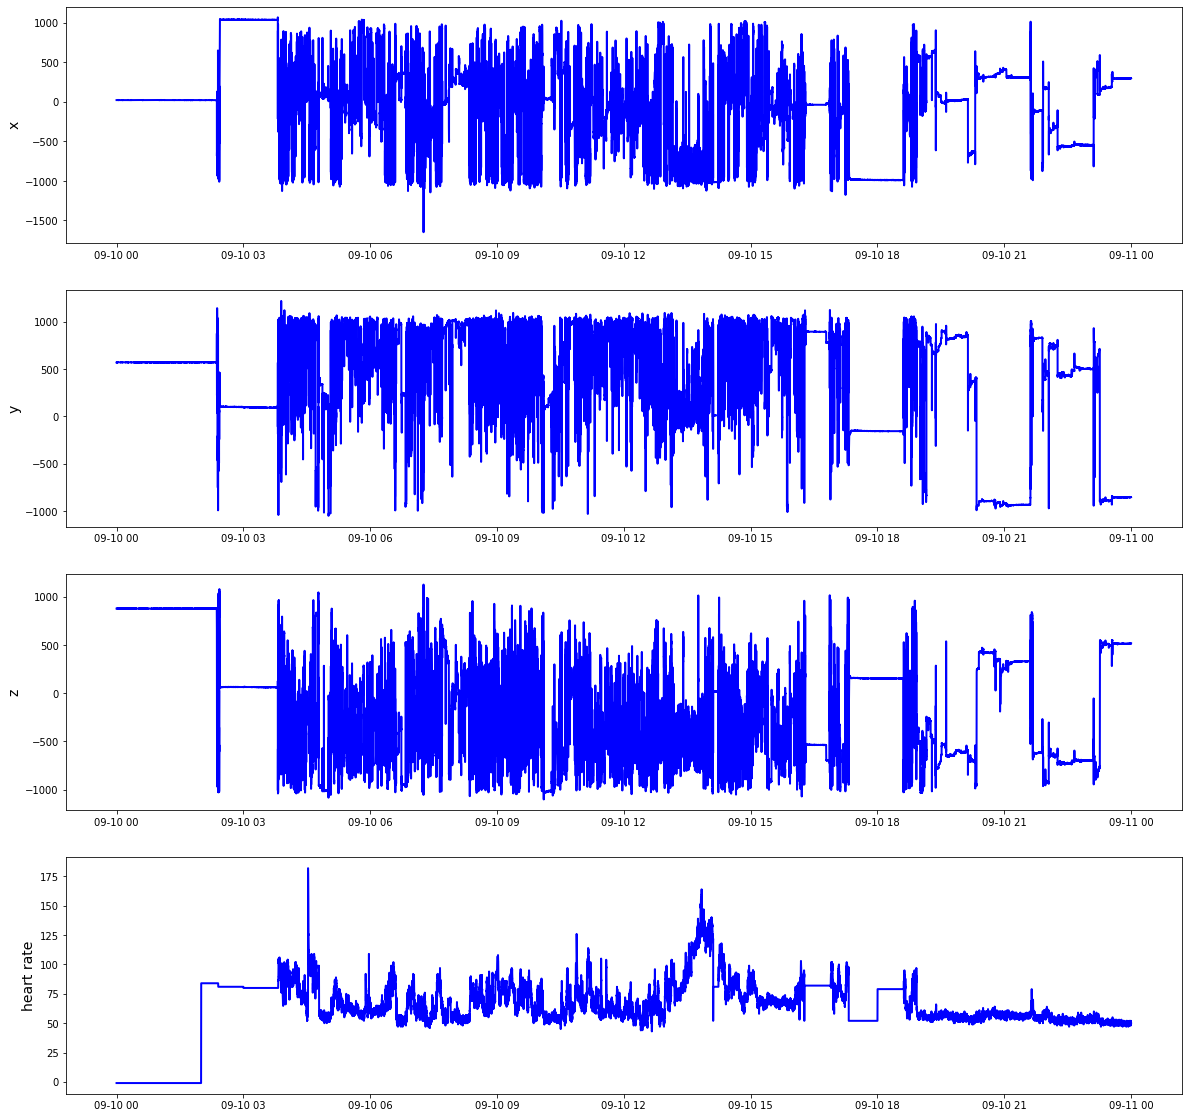

In [9]:
fig, axs = plt.subplots(4, 1,figsize=(20, 20))

axes = ['x', 'y', 'z', 'heart rate']

for i in range(4):
  if i == 0:
    axs[i].plot(t, x, color='b', linewidth=2)
  elif i == 1:
    axs[i].plot(t, y, color='b', linewidth=2)
  elif i == 2:
    axs[i].plot(t, z, color='b', linewidth=2)
  elif i == 3:
    axs[i].plot(t, hr, color='b', linewidth=2)
  
  axs[i].set_ylabel(axes[i], size=14)

In [10]:
t = pd.to_datetime(tdf['tsDate'][::300])
x = tdf['x'][::300]
y = tdf['y'][::300]
z = tdf['z'][::300]
hr = tdf['heartRate'][::300]

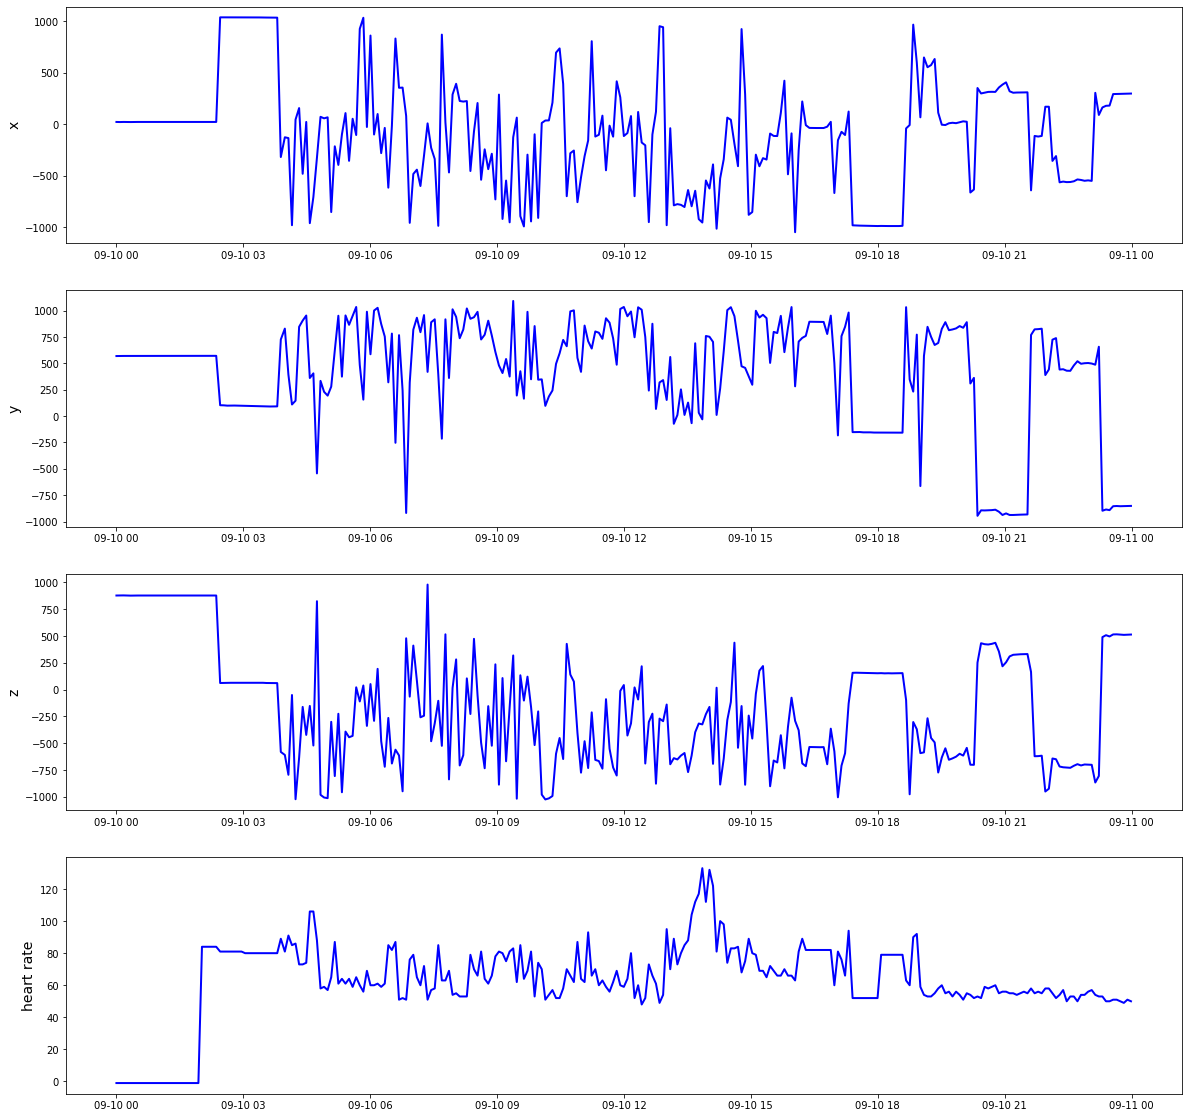

In [11]:
fig, axs = plt.subplots(4, 1,figsize=(20, 20))

axes = ['x', 'y', 'z', 'heart rate']

for i in range(4):
  if i == 0:
    axs[i].plot(t, x, color='b', linewidth=2)
  elif i == 1:
    axs[i].plot(t, y, color='b', linewidth=2)
  elif i == 2:
    axs[i].plot(t, z, color='b', linewidth=2)
  elif i == 3:
    axs[i].plot(t, hr, color='b', linewidth=2)
  
  axs[i].set_ylabel(axes[i], size=14)

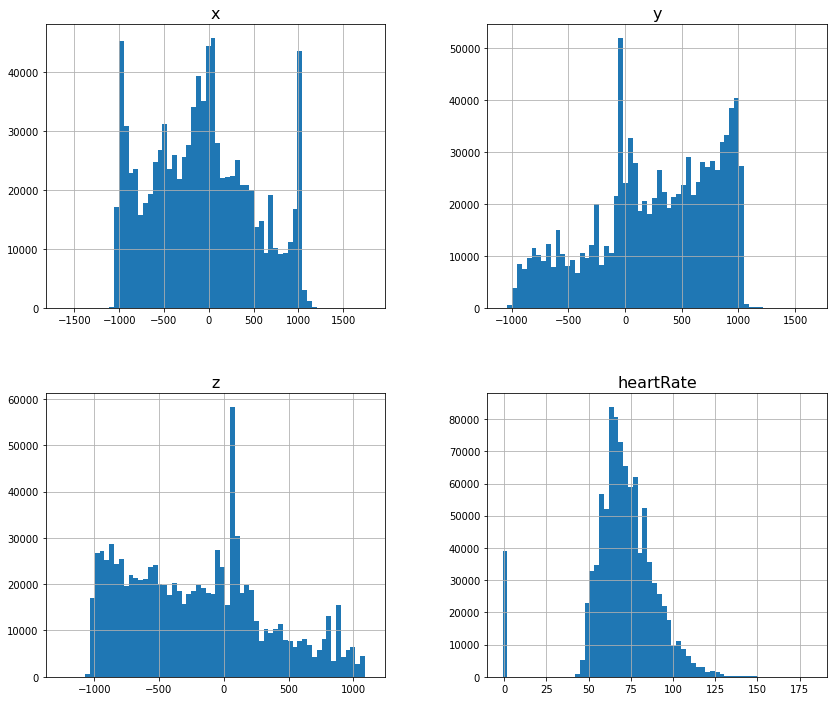

In [12]:
fig = trn_df[['x', 'y', 'z', 'heartRate']].hist(figsize = (14, 12), bins=64)
[x.title.set_size(16) for x in fig.ravel()]
plt.show()

## Inspect and cleanup

In [13]:
trn_df.describe().T

,count,mean,std,min,25%,50%,75%,max
patient,943522.0,2.965730e+03,1.318330e+03,1.502000e+03,1.505000e+03,3.507000e+03,4.502000e+03,4.506000e+03
x,943522.0,-8.299378e+01,5.770332e+02,-1.649000e+03,-5.320000e+02,-9.100000e+01,3.110000e+02,1.796000e+03
y,943522.0,2.653513e+02,5.397477e+02,-1.082000e+03,-5.900000e+01,3.130000e+02,7.390000e+02,1.644000e+03
z,943522.0,-2.039305e+02,5.349554e+02,-1.256000e+03,-6.650000e+02,-2.230000e+02,1.250000e+02,1.127000e+03
heartRate,943522.0,7.020357e+01,2.097376e+01,-1.000000e+00,6.100000e+01,7.000000e+01,8.200000e+01,1.820000e+02
timestamp,943522.0,1.570917e+12,2.063158e+09,1.568074e+12,1.568135e+12,1.572414e+12,1.572447e+12,1.572480e+12


In [14]:
trn_df.isna().sum()

patient      0
x            0
y            0
z            0
heartRate    0
timestamp    0
tsDate       0
dtype: int64

Replace missing values on heart rate attribute (labeled with -1) with median.

In [15]:
bad_hr = trn_df['heartRate'] == -1
trn_df['heartRate'][bad_hr] = np.median(trn_df['heartRate'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [16]:
trn_df.describe().T

,count,mean,std,min,25%,50%,75%,max
patient,943522.0,2.965730e+03,1.318330e+03,1.502000e+03,1.505000e+03,3.507000e+03,4.502000e+03,4.506000e+03
x,943522.0,-8.299378e+01,5.770332e+02,-1.649000e+03,-5.320000e+02,-9.100000e+01,3.110000e+02,1.796000e+03
y,943522.0,2.653513e+02,5.397477e+02,-1.082000e+03,-5.900000e+01,3.130000e+02,7.390000e+02,1.644000e+03
z,943522.0,-2.039305e+02,5.349554e+02,-1.256000e+03,-6.650000e+02,-2.230000e+02,1.250000e+02,1.127000e+03
heartRate,943522.0,7.314050e+01,1.488472e+01,3.400000e+01,6.300000e+01,7.000000e+01,8.200000e+01,1.820000e+02
timestamp,943522.0,1.570917e+12,2.063158e+09,1.568074e+12,1.568135e+12,1.572414e+12,1.572447e+12,1.572480e+12


## Feature engineering

Select only relevant attributes

In [17]:
train_df = trn_df[['x', 'y', 'z', 'heartRate']]


Sub-sampling the data from 1 second interval to 10 second interval.

In [18]:
train_df = train_df[slice(0, len(trn_df), 10)]

In [19]:
train_df = train_df.reset_index(drop=True)

## Split the data

In [20]:
n = len(train_df)

train_data = train_df[           : int(n*0.8)].to_numpy()
valid_data = train_df[int(n*0.8) :           ].to_numpy()
test_data  = tst_df[['x', 'y', 'z', 'heartRate']].to_numpy()

In [21]:
train_data.shape, valid_data.shape, test_data.shape

((75482, 4), (18871, 4), (722787, 4))

## Scale data

Normalize the data to [0, 1].

In [22]:
scaler = MinMaxScaler()

train = scaler.fit_transform(train_data.reshape(-1, 1))
valid = scaler.transform(valid_data.reshape(-1, 1))
test = scaler.transform(test_data.reshape(-1, 1))

In [23]:
train.shape, valid.shape, test.shape

((301928, 1), (75484, 1), (2891148, 1))

In [24]:
train = train.reshape((train_data.shape[0], 1, 4))
valid = valid.reshape((valid_data.shape[0], 1, 4))
test  = test.reshape((test_data.shape[0], 1, 4))

In [25]:
train.shape, valid.shape, test.shape

((75482, 1, 4), (18871, 1, 4), (722787, 1, 4))

# Model Data

## Autoencoder

In [26]:
encoder_inputs = tf.keras.layers.Input(shape=(1, 4))

encoder_l1 = tf.keras.layers.LSTM(16, return_state=True, activation='tanh')
encoder_outputs1 = encoder_l1(encoder_inputs)
encoder_states1 = encoder_outputs1[1:]

decoder_inputs = tf.keras.layers.RepeatVector(1)(encoder_outputs1[0])

decoder_l1 = tf.keras.layers.LSTM(16, return_sequences=True, activation='tanh')(decoder_inputs,initial_state = encoder_states1)
decoder_outputs1 = tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(4))(decoder_l1)

autoencoder = tf.keras.models.Model(encoder_inputs,decoder_outputs1)

autoencoder.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 1, 4)]       0           []                               
                                                                                                  
 lstm (LSTM)                    [(None, 16),         1344        ['input_1[0][0]']                
                                 (None, 16),                                                      
                                 (None, 16)]                                                      
                                                                                                  
 repeat_vector (RepeatVector)   (None, 1, 16)        0           ['lstm[0][0]']                   
                                                                                              

In [27]:
reduce_lr = tf.keras.callbacks.LearningRateScheduler(lambda x: 1e-3 * 0.90 ** x)

autoencoder.compile(loss = 'mae', optimizer='adam')
history = autoencoder.fit(train, train, epochs=60, validation_data=(valid, valid), verbose=1, batch_size=32, shuffle=False, callbacks=[reduce_lr])

Epoch 1/60
2359/2359 [==============================] - 18s 5ms/step - loss: 0.0461 - val_loss: 0.0125 - lr: 0.0010
Epoch 2/60
2359/2359 [==============================] - 7s 3ms/step - loss: 0.0051 - val_loss: 0.0106 - lr: 9.0000e-04
Epoch 3/60
2359/2359 [==============================] - 7s 3ms/step - loss: 0.0036 - val_loss: 0.0060 - lr: 8.1000e-04
Epoch 4/60
2359/2359 [==============================] - 7s 3ms/step - loss: 0.0026 - val_loss: 0.0053 - lr: 7.2900e-04
Epoch 5/60
2359/2359 [==============================] - 7s 3ms/step - loss: 0.0023 - val_loss: 0.0025 - lr: 6.5610e-04
Epoch 6/60
2359/2359 [==============================] - 7s 3ms/step - loss: 0.0021 - val_loss: 0.0036 - lr: 5.9049e-04
Epoch 7/60
2359/2359 [==============================] - 7s 3ms/step - loss: 0.0020 - val_loss: 0.0030 - lr: 5.3144e-04
Epoch 8/60
2359/2359 [==============================] - 7s 3ms/step - loss: 0.0018 - val_loss: 0.0034 - lr: 4.7830e-04
Epoch 9/60
2359/2359 [=============================

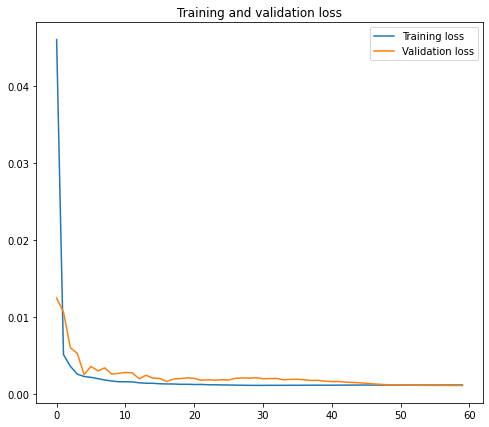

In [28]:
loss = history.history['loss'] 
val_loss = history.history['val_loss']
epochs = range(len(loss)) 

plt.figure(figsize=(8,7))
plt.plot(epochs, loss, label='Training loss') 
plt.plot(epochs, val_loss, label='Validation loss') 
plt.title('Training and validation loss')
plt.legend()
plt.show()

### Plot of train data, the reconstruction after it's encoded and decoded by the autoencoder, and the reconstruction error.

The three components of acceleration and heart rate over time for one volunteer (1502):

In [29]:
x = tdf[['x', 'y', 'z', 'heartRate']].to_numpy()
x = x.reshape((x.shape[0], 1, 4))

In [30]:
pred = autoencoder.predict(x)

In [31]:
x = x.reshape((x.shape[0], 4))
pred = pred.reshape((pred.shape[0], 4))

In [32]:
train_loss = tf.keras.losses.mae(pred, x)

In [33]:
t = pd.to_datetime(tdf['tsDate'][::300])
x = x[slice(0, len(x), 300)]

In [34]:
xp = x[:, 0]
yp = x[:, 1]
zp = x[:, 2]
hrp = x[:, 3]

In [35]:
x = tdf['x'][::300]
y = tdf['y'][::300]
z = tdf['z'][::300]
hr = tdf['heartRate'][::300]

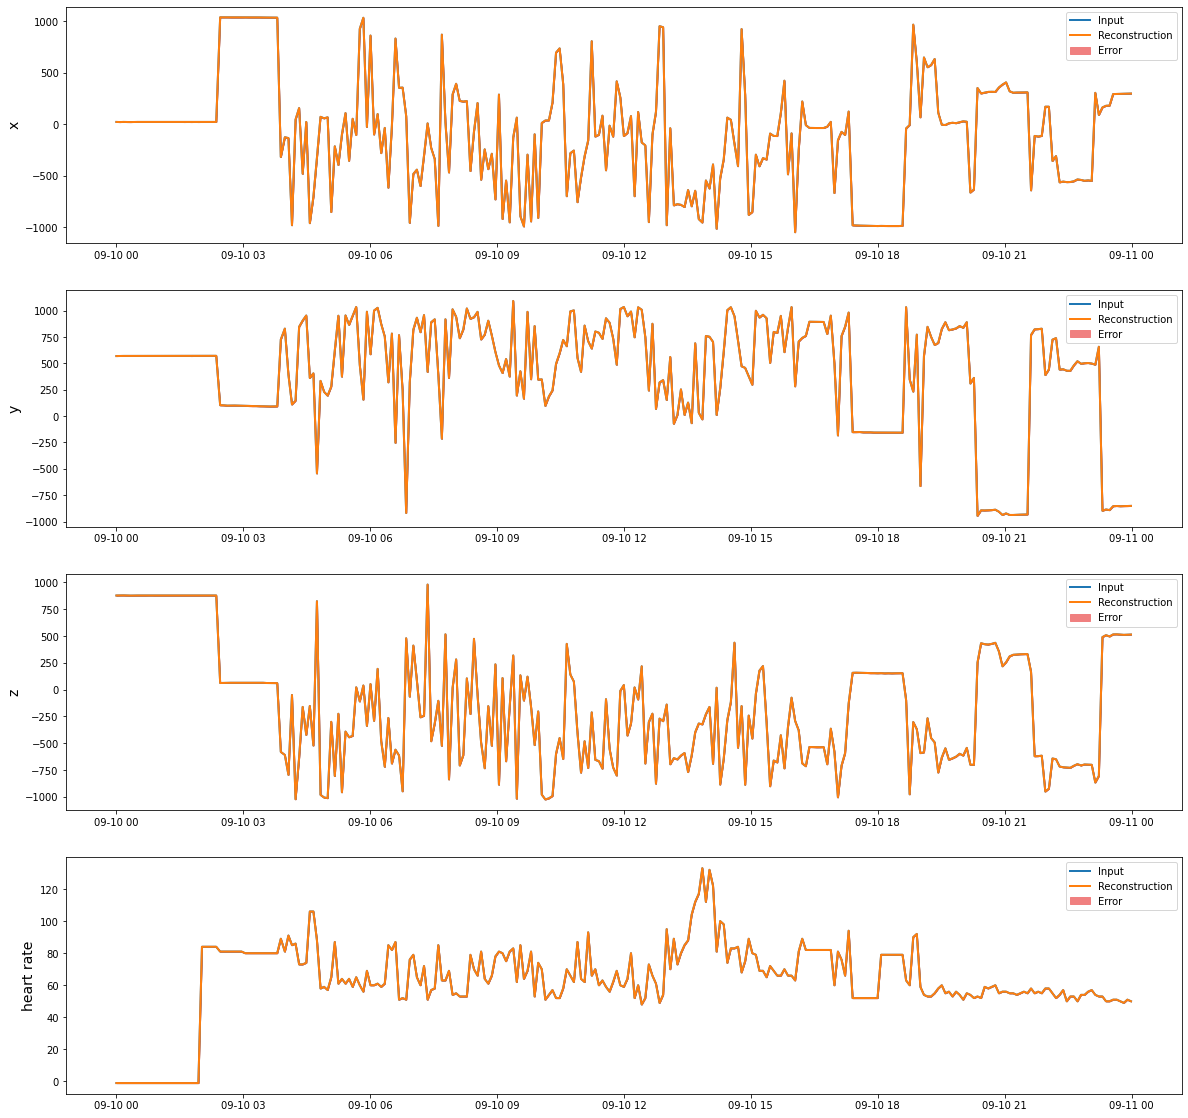

In [36]:
fig, axs = plt.subplots(4, 1,figsize=(20, 20))

axes = ['x', 'y', 'z', 'heart rate']

for i in range(4):
  if i == 0:
    axs[i].plot(t, x, linewidth=2)
    axs[i].plot(t, xp, linewidth=2)
    axs[i].set_ylabel('x',  size=14)
    axs[i].fill_between(t, x, xp, color='lightcoral')
    axs[i].legend(labels=["Input", "Reconstruction", "Error"])
  elif i == 1:
    axs[i].plot(t, y, linewidth=2)
    axs[i].plot(t, yp, linewidth=2)
    axs[i].set_ylabel('y',  size=14)
    axs[i].fill_between(t, y, yp, color='lightcoral')
    axs[i].legend(labels=["Input", "Reconstruction", "Error"])
  elif i == 2:
    axs[i].plot(t, z, linewidth=2)
    axs[i].plot(t, zp, linewidth=2)
    axs[i].set_ylabel('z',  size=14)
    axs[i].fill_between(t, z, zp, color='lightcoral')
    axs[i].legend(labels=["Input", "Reconstruction", "Error"])
  elif i == 3:
    axs[i].plot(t, hr, linewidth=2)
    axs[i].plot(t, hrp, linewidth=2)
    axs[i].set_ylabel('heart rate',  size=14)
    axs[i].fill_between(t, hr, hrp, color='lightcoral')
    axs[i].legend(labels=["Input", "Reconstruction", "Error"])

## Detect Anomaly

In [37]:
pred = autoencoder.predict(train)

In [38]:
train = train.reshape((train.shape[0], 4))
pred = pred.reshape((pred.shape[0], 4))

In [39]:
train_loss = tf.keras.losses.mae(pred, train)

We'll detect anomalies by calculating whether the reconstruction loss is greater than a fixed threshold.

In [40]:
pd.DataFrame(train_loss).describe().T

,count,mean,std,min,25%,50%,75%,max
0,75482.0,0.001197,0.000831,0.000037,0.000632,0.001021,0.001525,0.010176


We choose a threshold value then classify future examples as anomalous if the reconstruction error is higher than the threshold.

We will use three different thresholds values:
* calculate the mean and standard deviation of the reconstruction error of the training set, then classify future examples as anomalous if the reconstruction error is higher than one standard deviation from the training set.
* calculte the third quartile, then classify future examples as anomalous if the reconstruction error is higher than  this value
* classify future examples as anomalous if the reconstruction error is higher than  0.003

In [41]:
threshold_1 = 0.001469
threshold_2 = np.mean(train_loss) + np.std(train_loss)
threshold_3 = 0.003
print("Threshold: ", threshold_1)
print("Threshold: ", threshold_2)
print("Threshold: ", threshold_3)

Threshold:  0.001469
Threshold:  0.0020280426092733487
Threshold:  0.003


Plot the reconstruction error on the train data.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


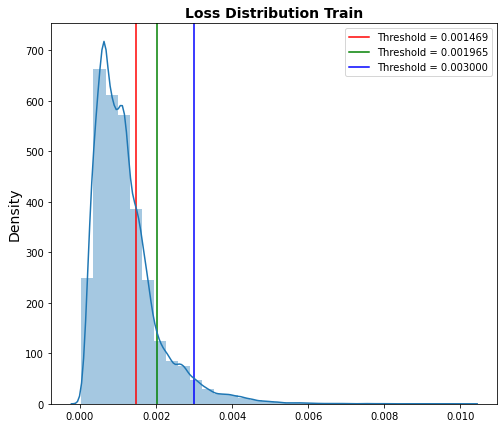

In [42]:
plt.figure(figsize=(8,7))
plt.title('Loss Distribution Train', size=14, fontweight="bold")
plt.axvline(x=threshold_1, color='r', label='Threshold = 0.001469')
plt.axvline(x=threshold_2, color='g', label='Threshold = 0.001965')
plt.axvline(x=threshold_3, color='b', label='Threshold = 0.003000')
plt.legend()
plt.ylabel('Density', size=14)
sns.distplot(train_loss, bins = 32, kde= True)

Plot the reconstruction error on the test data.

In [43]:
pred_test = autoencoder.predict(test)

In [44]:
test = test.reshape((test.shape[0], 4))
pred_test = pred_test.reshape((pred_test.shape[0], 4))

In [45]:
test_loss = tf.keras.losses.mae(pred_test, test)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


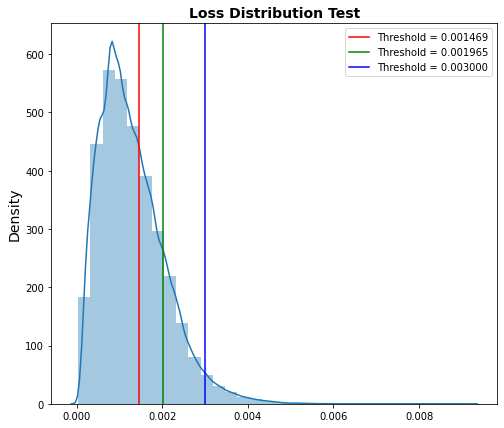

In [46]:
plt.figure(figsize=(8,7))
plt.title('Loss Distribution Test', size=14, fontweight="bold")
plt.ylabel('Density', size=14)
sns.distplot(test_loss, bins = 32, kde= True)
plt.axvline(x=threshold_1, color='r', label='Threshold = 0.001469')
plt.axvline(x=threshold_2, color='g', label='Threshold = 0.001965')
plt.axvline(x=threshold_3, color='b', label='Threshold = 0.003000')
plt.legend()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


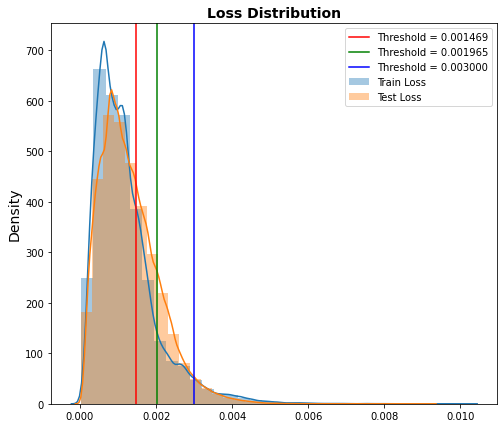

In [47]:
plt.figure(figsize=(8,7))
plt.title('Loss Distribution', size=14, fontweight="bold")
plt.ylabel('Density', size=14)
sns.distplot(train_loss, bins = 32, kde= True, label='Train Loss')
sns.distplot(test_loss, bins = 32, kde= True, label='Test Loss')
plt.axvline(x=threshold_1, color='r', label='Threshold = 0.001469')
plt.axvline(x=threshold_2, color='g', label='Threshold = 0.001965')
plt.axvline(x=threshold_3, color='b', label='Threshold = 0.003000')
plt.legend()

In [48]:
t = pd.to_datetime(tst_df[tst_df.patient == 1004]['tsDate'][::300])
x = test_loss[slice(0, len(tst_df[tst_df.patient == 1004]['tsDate']), 300)]

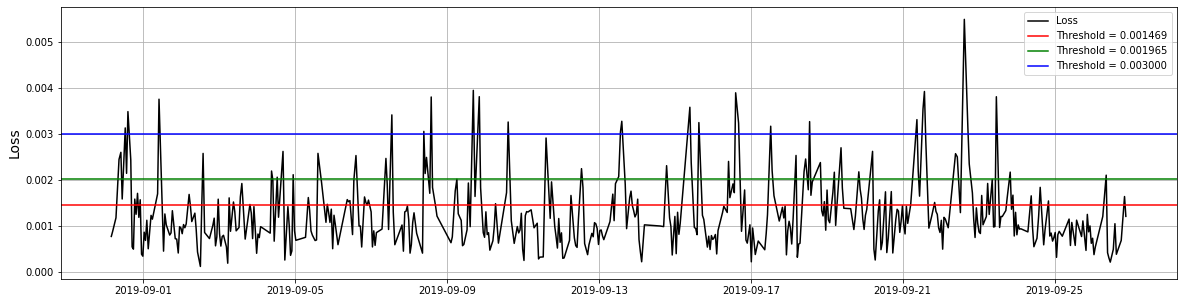

In [49]:
plt.figure(figsize=(20, 5))
plt.plot(t, x, '-k', label='Loss')

plt.axhline(y=threshold_1, color='r', label='Threshold = 0.001469')
plt.axhline(y=threshold_2, color='g', label='Threshold = 0.001965')
plt.axhline(y=threshold_3, color='b', label='Threshold = 0.003000')
plt.ylabel('Loss', size=14)
plt.legend()
plt.grid()
plt.show()

### Save predictions

In [50]:
anomaly_1 = tf.math.less(test_loss, threshold_1)
anomaly_2 = tf.math.less(test_loss, threshold_2)
anomaly_3 = tf.math.less(test_loss, threshold_3)

In [51]:
tst_df['threshold=0.0014'] = anomaly_1
tst_df['threshold=0.0019'] = anomaly_2
tst_df['threshold=0.0030'] = anomaly_3

In [52]:
tst_df.head(10)

,patient,timestamp,tsDate,x,y,z,heartRate,threshold=0.0014,threshold=0.0019,threshold=0.0030
0,1004,1567224000000,2019-08-31 04:00:00.004,-24,749,-626,77,True,True,True
1,1004,1567224010000,2019-08-31 04:00:10.022,-206,930,-63,77,True,True,True
2,1004,1567224020000,2019-08-31 04:00:20.041,-139,763,-577,72,True,True,True
3,1004,1567224030000,2019-08-31 04:00:30.059,-503,441,-557,73,True,True,True
4,1004,1567224040000,2019-08-31 04:00:40.060,-278,705,-396,78,True,True,True
5,1004,1567224050000,2019-08-31 04:00:50.079,240,839,-310,79,True,True,True
6,1004,1567224060000,2019-08-31 04:01:00.099,-671,318,-213,80,False,True,True
7,1004,1567224070000,2019-08-31 04:01:10.118,-45,296,-927,79,True,True,True
8,1004,1567224080000,2019-08-31 04:01:20.136,102,294,-888,86,False,True,True
9,1004,1567224090000,2019-08-31 04:01:30.145,15,635,-671,87,False,True,True


In [53]:
f = open("/content/drive/MyDrive/Colab Notebooks/DL_Project/task_2/test_labeled.csv", 'w')
f.write(tst_df.to_csv(index=False))
f.close()

### Plot of test , the reconstruction after it's encoded and decoded by the autoencoder, and the reconstruction error for patient 1004.

In [54]:
t = pd.to_datetime(tst_df[tst_df.patient == 1004]['tsDate'][::300])
x_pred_test = pred_test[slice(0, len(tst_df[tst_df.patient == 1004]), 300)]
x_test = test[slice(0, len(tst_df[tst_df.patient == 1004]), 300)]

In [55]:
xp = x_pred_test[:, 0]
yp = x_pred_test[:, 1]
zp = x_pred_test[:, 2]
hrp = x_pred_test[:, 3]

In [56]:
x = x_test[:, 0]
y = x_test[:, 1]
z = x_test[:, 2]
hr = x_test[:, 3]

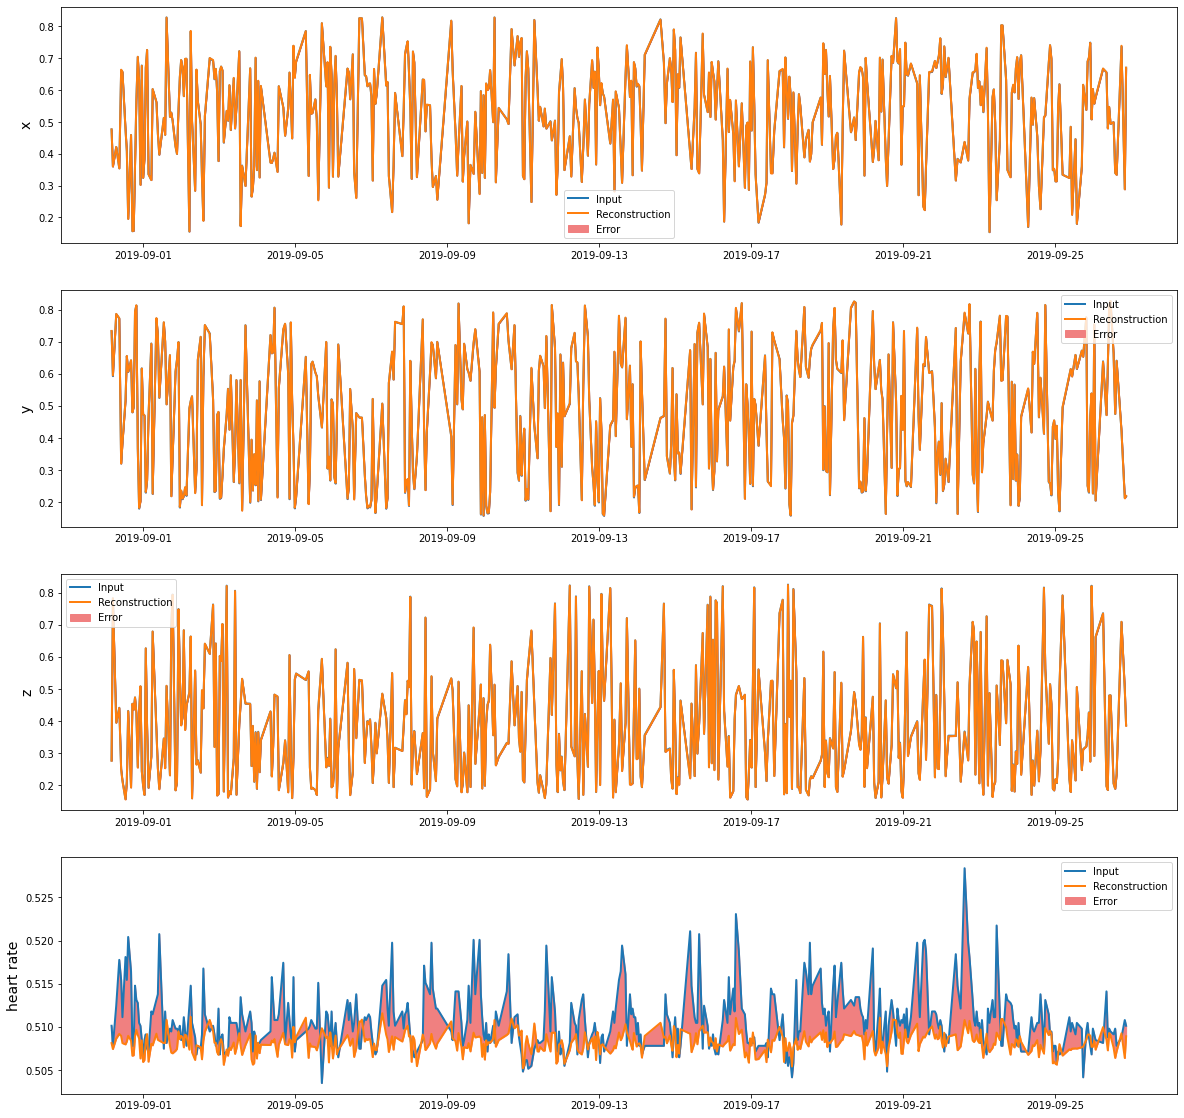

In [57]:
fig, axs = plt.subplots(4, 1,figsize=(20, 20))

axes = ['x', 'y', 'z', 'heart rate']

for i in range(4):
  if i == 0:
    axs[i].plot(t, x, linewidth=2)
    axs[i].plot(t, xp, linewidth=2)
    axs[i].set_ylabel('x',  size=14)
    axs[i].fill_between(t, x, xp, color='lightcoral')
    axs[i].legend(labels=["Input", "Reconstruction", "Error"])
  elif i == 1:
    axs[i].plot(t, y, linewidth=2)
    axs[i].plot(t, yp, linewidth=2)
    axs[i].set_ylabel('y',  size=14)
    axs[i].fill_between(t, y, yp, color='lightcoral')
    axs[i].legend(labels=["Input", "Reconstruction", "Error"])
  elif i == 2:
    axs[i].plot(t, z, linewidth=2)
    axs[i].plot(t, zp, linewidth=2)
    axs[i].set_ylabel('z',  size=14)
    axs[i].fill_between(t, z, zp, color='lightcoral')
    axs[i].legend(labels=["Input", "Reconstruction", "Error"])
  elif i == 3:
    axs[i].plot(t, hr, linewidth=2)
    axs[i].plot(t, hrp, linewidth=2)
    axs[i].set_ylabel('heart rate',  size=14)
    axs[i].fill_between(t, hr, hrp, color='lightcoral')
    axs[i].legend(labels=["Input", "Reconstruction", "Error"])